## <center/>Advanced Mathematical Statistics (MTH 522)<center/>
### <center/>Project 2<center/>
### <center/>Investigating Statistical Significance and Effect Size of Crab Shells Molting Data<center/>


####                                        <center>Submitted By:<center/>
#####                     <center>Supreeth Mohan - 02036259<center/>
#####                     <center><center>Roshni Pal - 02137180<center/>
#####                     <center> Trina Xavier - 02102403<center/>
#####                     <center>Aryan Bhalla – 02107402<center/>


Descriptive Statistics for Field:
Post-Molt Variable:
Max: 166.5
Min: 127.7
Median: 154.0
Mean: 152.963963963964
Standard Deviation: 6.689628826514907
Skewness: -1.1190639272669074
Kurtosis: 2.240706021848948

Pre-Molt Variable:
Max: 153.9
Min: 113.6
Median: 140.1
Mean: 139.00900900900902
Standard Deviation: 7.218414259610089
Skewness: -1.1108752329732863
Kurtosis: 1.761443251555594


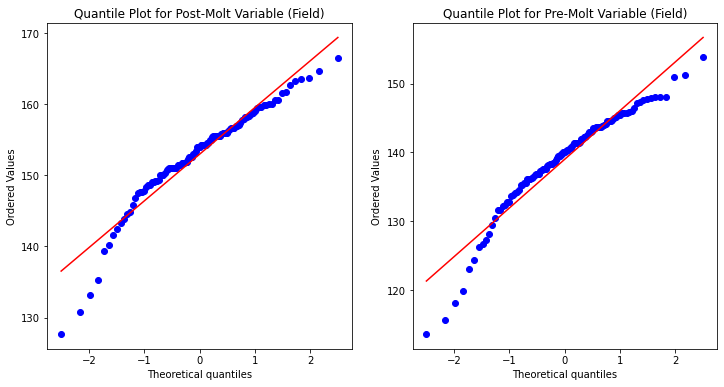


Descriptive Statistics for Lab:
Post-Molt Variable:
Max: 166.8
Min: 38.8
Median: 143.7
Mean: 141.10997229916896
Standard Deviation: 15.259600683459029
Skewness: -2.2881145615037486
Kurtosis: 9.442201794919175

Pre-Molt Variable:
Max: 155.1
Min: 31.1
Median: 128.9
Mean: 126.1994459833795
Standard Deviation: 16.545814836771658
Skewness: -1.8889368862480798
Kurtosis: 6.024397123246965


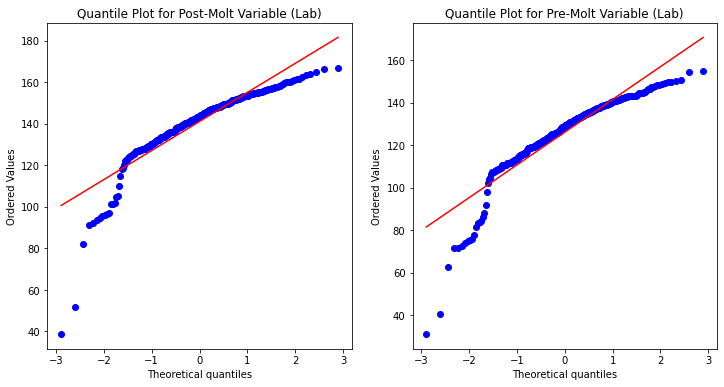

In [7]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load data from CSV file
data = pd.read_csv('Crab Molt Data.csv')

df_cleaned = data.dropna()

# Separate data for each location
locations = df_cleaned['Location'].unique()

for location in locations:
    subset = df_cleaned[df_cleaned['Location'] == location]
    pre_molt = subset['Pre-molt'].sort_values().to_numpy()
    post_molt = subset['Post-molt'].sort_values().to_numpy()
    field_data = data[data['Location'] == 'Field']

    # Descriptive statistics for post-molt variable
    post_molt_max = np.max(post_molt)
    post_molt_min = np.min(post_molt)
    post_molt_median = np.median(post_molt)
    post_molt_mean = np.mean(post_molt)
    post_molt_std = np.std(post_molt)
    post_molt_skewness = stats.skew(post_molt)
    post_molt_kurtosis = stats.kurtosis(post_molt)

    # Descriptive statistics for pre-molt variable
    pre_molt_max = np.max(pre_molt)
    pre_molt_min = np.min(pre_molt)
    pre_molt_median = np.median(pre_molt)
    pre_molt_mean = np.mean(pre_molt)
    pre_molt_std = np.std(pre_molt)
    pre_molt_skewness = stats.skew(pre_molt)
    pre_molt_kurtosis = stats.kurtosis(pre_molt)

    # Printing descriptive statistics
    print(f"\nDescriptive Statistics for {location}:")
    print("Post-Molt Variable:")
    print("Max:", post_molt_max)
    print("Min:", post_molt_min)
    print("Median:", post_molt_median)
    print("Mean:", post_molt_mean)
    print("Standard Deviation:", post_molt_std)
    print("Skewness:", post_molt_skewness)
    print("Kurtosis:", post_molt_kurtosis)

    print("\nPre-Molt Variable:")
    print("Max:", pre_molt_max)
    print("Min:", pre_molt_min)
    print("Median:", pre_molt_median)
    print("Mean:", pre_molt_mean)
    print("Standard Deviation:", pre_molt_std)
    print("Skewness:", pre_molt_skewness)
    print("Kurtosis:", pre_molt_kurtosis)

    # Quantile plot for normality
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    stats.probplot(post_molt, dist="norm", plot=plt)
    plt.title(f"Quantile Plot for Post-Molt Variable ({location})")

    plt.subplot(1, 2, 2)
    stats.probplot(pre_molt, dist="norm", plot=plt)
    plt.title(f"Quantile Plot for Pre-Molt Variable ({location})")

    plt.show()


In [11]:
for location in locations:
    subset = df_cleaned[df_cleaned['Location'] == location]
    pre_molt = subset['Pre-molt'].sort_values().to_numpy()
    post_molt = subset['Post-molt'].sort_values().to_numpy()
    field_data = data[data['Location'] == 'Field']
    
    print(f"\nTests for Normality - Location: {location}")
    alpha = 0.05

    # Anderson-Darling test
    ad_stat_post, ad_crit_values_post, ad_sig_level_post = stats.anderson(post_molt, dist='norm')
    ad_stat_pre, ad_crit_values_pre, ad_sig_level_pre = stats.anderson(pre_molt, dist='norm')
    print("Anderson-Darling Test for Post-Molt Variable:")
    print("Statistic:", ad_stat_post)
    print("Critical Values:", ad_crit_values_post)
    print("Significance Level:", ad_sig_level_post)
    print("Is Normal (Post-Molt)?", ad_stat_post < ad_crit_values_post[2])

    print("\nAnderson-Darling Test for Pre-Molt Variable:")
    print("Statistic:", ad_stat_pre)
    print("Critical Values:", ad_crit_values_pre)
    print("Significance Level:", ad_sig_level_pre)
    print("Is Normal (Pre-Molt)?", ad_stat_pre < ad_crit_values_pre[2])

    # Shapiro-Wilk test
    shapiro_stat_post, shapiro_p_post = stats.shapiro(post_molt)
    shapiro_stat_pre, shapiro_p_pre = stats.shapiro(pre_molt)
    print("\nShapiro-Wilk Test for Post-Molt Variable:")
    print("Statistic:", shapiro_stat_post)
    print("p-value:", shapiro_p_post)
    print("Is Normal (Post-Molt)?", shapiro_p_post > alpha)

    print("\nShapiro-Wilk Test for Pre-Molt Variable:")
    print("Statistic:", shapiro_stat_pre)
    print("p-value:", shapiro_p_pre)
    print("Is Normal (Pre-Molt)?", shapiro_p_pre > alpha)
    
    # Kolmogorov-Smirnov test
    ks_stat_post, ks_p_post = stats.kstest(post_molt, 'norm')
    ks_stat_pre, ks_p_pre = stats.kstest(pre_molt, 'norm')
    print("\nKolmogorov-Smirnov Test for Post-Molt Variable:")
    print("Statistic:", ks_stat_post)
    print("p-value:", ks_p_post)
    print("Is Normal (Post-Molt)?", ks_p_post > alpha)

    print("\nKolmogorov-Smirnov Test for Pre-Molt Variable:")
    print("Statistic:", ks_stat_pre)
    print("p-value:", ks_p_pre)
    print("Is Normal (Pre-Molt)?", ks_p_pre > alpha)
    
#     # Cramér-von Mises test
#     cvm_stat_post, cvm_p_post = stats.cramer_von_mises(post_molt, 'norm')
#     cvm_stat_pre, cvm_p_pre = stats.cramer_von_mises(pre_molt, 'norm')
#     print("\nCramér-von Mises Test for Post-Molt Variable:")
#     print("Statistic:", cvm_stat_post)
#     print("p-value:", cvm_p_post)
#     print("Is Normal (Post-Molt)?", cvm_p_post > alpha)

#     print("\nCramér-von Mises Test for Pre-Molt Variable:")
#     print("Statistic:", cvm_stat_pre)
#     print("p-value:", cvm_p_pre)
#     print("Is Normal (Pre-Molt)?", cvm_p_pre > alpha)



Tests for Normality - Location: Field
Anderson-Darling Test for Post-Molt Variable:
Statistic: 1.6674433342669914
Critical Values: [0.557 0.634 0.761 0.888 1.056]
Significance Level: [15.  10.   5.   2.5  1. ]
Is Normal (Post-Molt)? False

Anderson-Darling Test for Pre-Molt Variable:
Statistic: 1.899067442726178
Critical Values: [0.557 0.634 0.761 0.888 1.056]
Significance Level: [15.  10.   5.   2.5  1. ]
Is Normal (Pre-Molt)? False

Shapiro-Wilk Test for Post-Molt Variable:
Statistic: 0.9334666132926941
p-value: 3.226193075533956e-05
Is Normal (Post-Molt)? False

Shapiro-Wilk Test for Pre-Molt Variable:
Statistic: 0.9313223361968994
p-value: 2.3873255486250855e-05
Is Normal (Pre-Molt)? False

Kolmogorov-Smirnov Test for Post-Molt Variable:
Statistic: 1.0
p-value: 0.0
Is Normal (Post-Molt)? False

Kolmogorov-Smirnov Test for Pre-Molt Variable:
Statistic: 1.0
p-value: 0.0
Is Normal (Pre-Molt)? False

Tests for Normality - Location: Lab
Anderson-Darling Test for Post-Molt Variable:
Sta

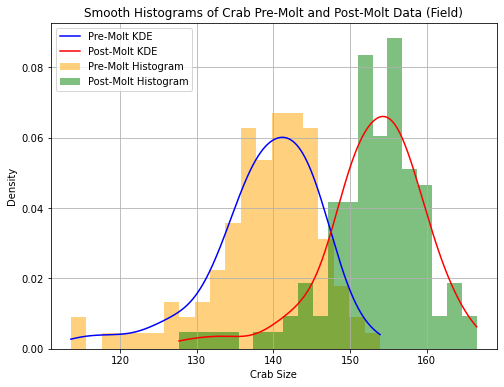

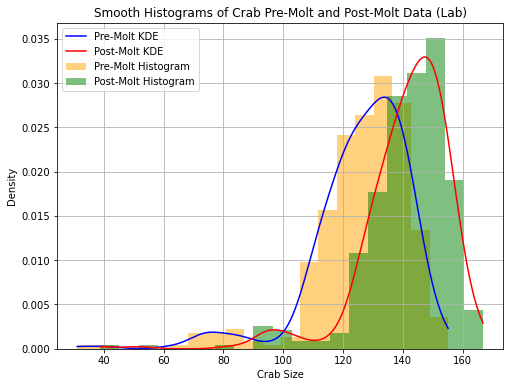

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Load data from CSV file
data = pd.read_csv('Crab Molt Data.csv')

df_cleaned = data.dropna()

# Separate data for each location
locations = df_cleaned['Location'].unique()

for location in locations:
    subset = df_cleaned[df_cleaned['Location'] == location]
    pre_molt = subset['Pre-molt'].sort_values().to_numpy()
    post_molt = subset['Post-molt'].sort_values().to_numpy()

    # Set up the figure and axis
    plt.figure(figsize=(8, 6))

    # Create a kernel density estimation for pre-molt
    kde_pre_molt = gaussian_kde(pre_molt)
    # Create a range of x values for the plot
    x_values_pre_molt = np.linspace(min(pre_molt), max(pre_molt), 1000)
    # Plot the kernel density estimate for pre-molt
    plt.plot(x_values_pre_molt, kde_pre_molt(x_values_pre_molt), color='blue', label='Pre-Molt KDE')

    # Create a kernel density estimation for post-molt
    kde_post_molt = gaussian_kde(post_molt)
    # Create a range of x values for the plot
    x_values_post_molt = np.linspace(min(post_molt), max(post_molt), 1000)
    # Plot the kernel density estimate for post-molt
    plt.plot(x_values_post_molt, kde_post_molt(x_values_post_molt), color='red', label='Post-Molt KDE')

    # Plot the histogram for comparison for pre-molt
    plt.hist(pre_molt, bins=20, density=True, color='orange', alpha=0.5, label='Pre-Molt Histogram')

    # Plot the histogram for comparison for post-molt
    plt.hist(post_molt, bins=20, density=True, color='green', alpha=0.5, label='Post-Molt Histogram')

    # Add labels and legend
    plt.title(f'Smooth Histograms of Crab Pre-Molt and Post-Molt Data ({location})')
    plt.xlabel('Crab Size')
    plt.ylabel('Density')
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()


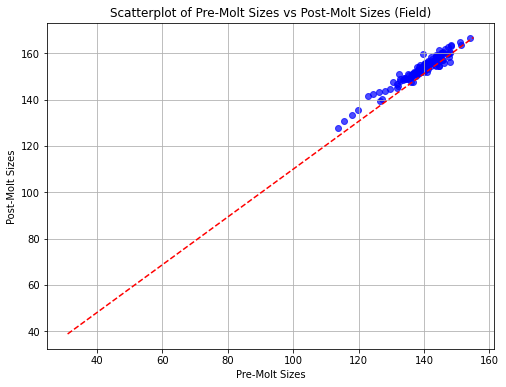

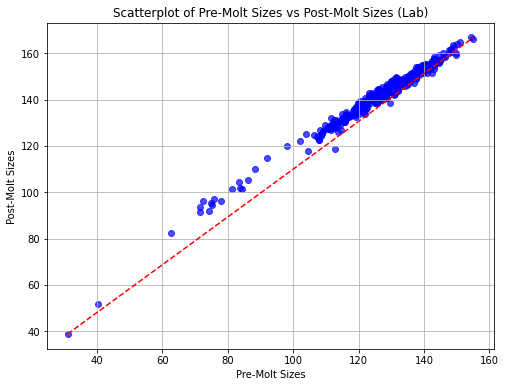

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('Crab Molt Data.csv')

# Drop rows with missing values
df_cleaned = data.dropna()

# Get unique locations
locations = df_cleaned['Location'].unique()

# Create scatterplots for each location
for location in locations:
    # Filter data for the current location
    subset = df_cleaned[df_cleaned['Location'] == location]
    
    # Extract pre-molt and post-molt sizes for the current location
    pre_molt_sizes = subset['Pre-molt']
    post_molt_sizes = subset['Post-molt']

    # Create a scatterplot
    plt.figure(figsize=(8, 6))
    plt.scatter(pre_molt_sizes, post_molt_sizes, color='blue', alpha=0.7)
    
    # Plot the line of equality (y = x)
    plt.plot([min(pre_molt), max(pre_molt)], [min(post_molt), max(post_molt)], color='red', linestyle='--', label='Line of Equality')


    # Add labels and title
    plt.xlabel('Pre-Molt Sizes')
    plt.ylabel('Post-Molt Sizes')
    plt.title(f'Scatterplot of Pre-Molt Sizes vs Post-Molt Sizes ({location})')

    # Show the plot
    plt.grid(True)
    plt.show()


/tmp/ipykernel_90/541765054.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


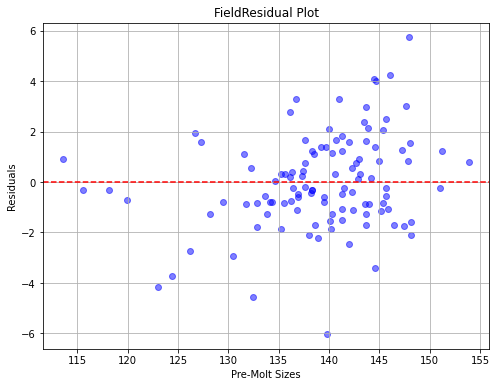

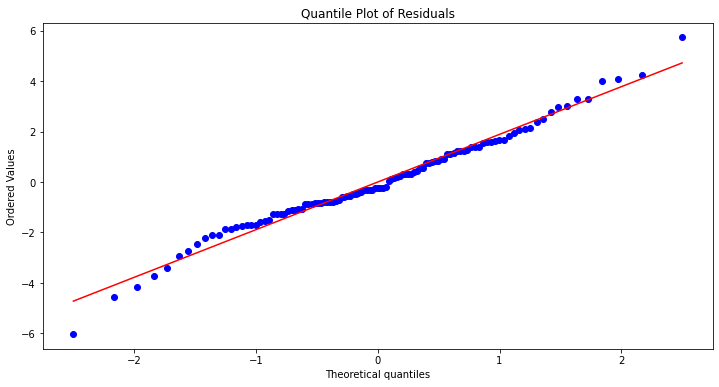


Results for Location: Field
Pearson's R-squared Value: 0.9327747000533485
Skewness of Residuals: 0.03555623363971764
Kurtosis of Residuals: 0.9129150626627185
Kolmogorov-Smirnov Test p-value: 0.010230588359506536
Anderson-Darling Test Statistic: 0.5582741222672638
Shapiro-Wilk Test p-value: 0.2832678556442261
Breusch–Pagan Test p-value: 0.6391625703140218
White Test p-value: 0.8113986123627352


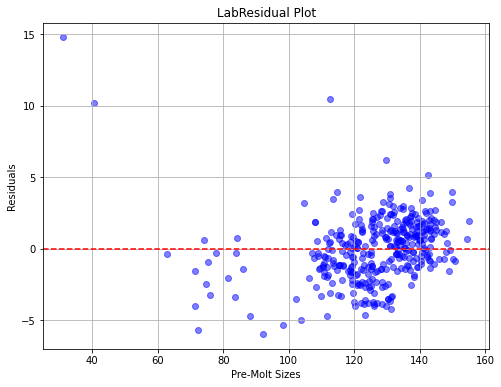

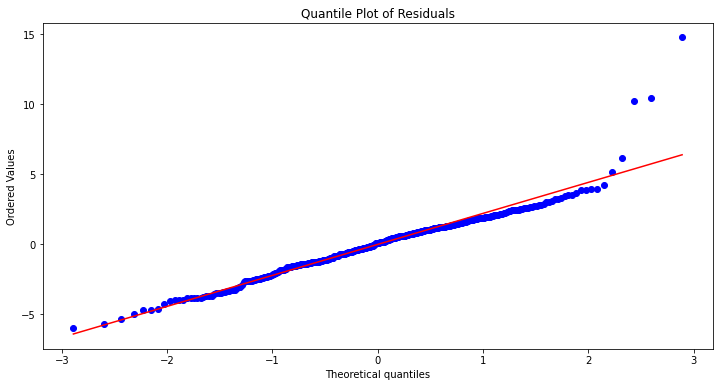


Results for Location: Lab
Pearson's R-squared Value: 0.9809989339639513
Skewness of Residuals: 1.0124432564966326
Kurtosis of Residuals: 6.000611992318092
Kolmogorov-Smirnov Test p-value: 1.2346838453029278e-10
Anderson-Darling Test Statistic: 1.8831147071539363
Shapiro-Wilk Test p-value: 1.3762647271819972e-11
Breusch–Pagan Test p-value: 3.80492634182222e-19
White Test p-value: 6.970190513179e-43


In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('Crab Molt Data.csv')

# Drop rows with missing values
df_cleaned = data.dropna()

# Get unique locations
locations = df_cleaned['Location'].unique()

# Create scatterplots for each location
for location in locations:
    # Filter data for the current location
    subset = df_cleaned[df_cleaned['Location'] == location]
    
    # Extract pre-molt and post-molt sizes for the current location
    pre_molt_sizes = subset['Pre-molt']
    post_molt_sizes = subset['Post-molt']

    # Fit the linear regression model
    X = sm.add_constant(post_molt_sizes)  # Add a constant term to the predictor
    model = sm.OLS(pre_molt_sizes, X)
    results = model.fit()

    # Calculate Pearson's R-squared value
    r_squared = results.rsquared

    # Compute residuals
    residuals = results.resid

    # Plot the residuals
    plt.figure(figsize=(8, 6))
    plt.scatter(pre_molt_sizes, residuals, color='blue', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'{location}Residual Plot')
    plt.xlabel('Pre-Molt Sizes')
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.show()

    # Check for normality of residuals
    skewness = stats.skew(residuals)
    kurtosis = stats.kurtosis(residuals)
    plt.figure(figsize=(12, 6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title('Quantile Plot of Residuals')
    plt.show()

    # Perform normality tests
    ks_statistic, ks_p_value = stats.kstest(residuals, 'norm')
    ad_statistic, ad_critical_values, _ = stats.anderson(residuals, dist='norm')
    shapiro_statistic, shapiro_p_value = stats.shapiro(residuals)

    # Check for heteroskedasticity
    # Visual estimation from the plot of residuals can be performed above
    # Breusch–Pagan test
    bp_test = sm.stats.diagnostic.het_breuschpagan(residuals, X)
    white_test = sm.stats.diagnostic.het_white(residuals, X)

    # Print the results for each location
    print(f"\nResults for Location: {location}")
    print("Pearson's R-squared Value:", r_squared)
    print("Skewness of Residuals:", skewness)
    print("Kurtosis of Residuals:", kurtosis)
    print("Kolmogorov-Smirnov Test p-value:", ks_p_value)
    print("Anderson-Darling Test Statistic:", ad_statistic)
    print("Shapiro-Wilk Test p-value:", shapiro_p_value)
    print("Breusch–Pagan Test p-value:", bp_test[1])
    print("White Test p-value:", white_test[1])


In [18]:
import pandas as pd
import statsmodels.api as sm

# Load data from CSV file
data = pd.read_csv('Crab Molt Data.csv')

# Separate data into lab and field crabs
lab_crabs = data[data['Location'] == 'Lab']
field_crabs = data[data['Location'] == 'Field']

# Fit linear regression models for lab crabs
X_lab = lab_crabs[['Post-molt']]
y_lab = lab_crabs['Pre-molt']
X_lab = sm.add_constant(X_lab)  # Add constant term
model_lab = sm.OLS(y_lab, X_lab)
results_lab = model_lab.fit()

# Fit linear regression models for field crabs
X_field = field_crabs[['Post-molt']]
y_field = field_crabs['Pre-molt']
X_field = sm.add_constant(X_field)  # Add constant term
model_field = sm.OLS(y_field, X_field)
results_field = model_field.fit()

# Compare models
print("Lab Crab Model Summary:")
print(results_lab.summary())

print("\nField Crab Model Summary:")
print(results_field.summary())

Lab Crab Model Summary:
                            OLS Regression Results                            
Dep. Variable:               Pre-molt   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.853e+04
Date:                Sun, 18 Feb 2024   Prob (F-statistic):          4.67e-311
Time:                        14:27:34   Log-Likelihood:                -809.88
No. Observations:                 361   AIC:                             1624.
Df Residuals:                     359   BIC:                             1632.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.3439      1

In [17]:
from sklearn.model_selection import KFold

# Define the number of folds for cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
r_squared_values = []
mse_values = []

# Iterate over each location
for location in locations:
    # Filter data for the current location
    subset = df_cleaned[df_cleaned['Location'] == location]
    
    # Extract pre-molt and post-molt sizes for the current location
    pre_molt_sizes = subset['Pre-molt']
    post_molt_sizes = subset['Post-molt']
    X = sm.add_constant(post_molt_sizes)  # Add a constant term to the predictor
    
    # Initialize lists to store fold-specific evaluation metrics
    fold_r_squared_values = []
    fold_mse_values = []
    

    # Iterate over each fold
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = pre_molt_sizes.iloc[train_index], pre_molt_sizes.iloc[test_index]
        
        # Fit the linear regression model
        model = sm.OLS(y_train, X_train)
        results = model.fit()

        # Calculate R-squared
        r_squared = results.rsquared
        fold_r_squared_values.append(r_squared)

        # Calculate MSE
        y_pred = results.predict(X_test)
        mse = ((y_pred - y_test) ** 2).mean()
        fold_mse_values.append(mse)

    # Aggregate metrics across folds
    avg_r_squared = np.mean(fold_r_squared_values)
    avg_mse = np.mean(fold_mse_values)
    r_squared_values.append(avg_r_squared)
    mse_values.append(avg_mse)
    

    # Print results for the current location
    print(f"\nResults for Location: {location}")
    print("Average R-squared Value:", avg_r_squared)
    print("Average MSE:", avg_mse)
    

# Print aggregated results
print("\nOverall Results:")
print("Average R-squared Values:", r_squared_values)
print("Average MSE Values:", mse_values)



Results for Location: Field
Average R-squared Value: 0.9320986796247555
Average MSE: 3.6567124149879247

Results for Location: Lab
Average R-squared Value: 0.9810248315703239
Average MSE: 5.444821485087482

Overall Results:
Average R-squared Values: [0.9320986796247555, 0.9810248315703239]
Average MSE Values: [3.6567124149879247, 5.444821485087482]
